# Trabajo practico 1

# Integrantes: 

* Lara Herling - 314/22

* Valentina Anton - 322/20



## IMPORTS

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math

## EJERCICIO 1

In [10]:
def producto_matriz_k_veces(A, k): #se asume k>0
    B = A
    i = 1
    while (i < k):  #B = A^i al finalizar cada iteración del ciclo. Por eso i<k
        B = B@A
        i = i+1
    return B;

#Dada una matriz cuadrada A de nxn, un vector v cualquiera de n elementos y un entero positivo k,
#esta función realiza k iteraciones del método de la potencia con A y v
def metodo_de_la_potencia(A, v, k):
    res = v.copy()
    if k>=1:
        matriz = producto_matriz_k_veces(A, k)
        Av = matriz@res
        res = Av/np.linalg.norm(Av, 2)
    return res

#Dada una matriz cuadrada A de nxn y v vector de longitud n, esta función calcula el cociente de Rayleigh
def cociente_rayleigh(v,A):
    num = v @ A @ v
    den = v @ v
    return num/den  

#Dada una matriz cuadrada A de nxn, un vector v de longitud n y un entero positivo k,
#esta función devuelve una aproximación al autovalor de la matriz A,
#obtenida tras realizar k iteraciones del método de la potencia con el vector v
def autovalor_aproximado (A, v, k):
    autovector = metodo_de_la_potencia(A, v, k)
    autovalor = cociente_rayleigh(autovector, A)
    return autovalor

#Dada una matriz diagonalizable A, un vector v y un número entero k >= 0, 
#esta función realiza k iteraciones del método de la potencia con A y v
#y devuelve una lista donde, en cada posición i, muestra el autovalor aproximado
#obtenido en la iteración i de este método.
def vector_autovalores(A, v, k):
    res = np.array([])
    i = 0
    while i <= k:
        a = autovalor_aproximado(A, v, i)
        res = np.append(res, a)
        i += 1
    return res

## EJERCICIO 2


In [12]:
def generarMatrizTipoA(n):
    A = np.random.rand(n,n)
    # genera una matriz de elementos reales aleatorios, de forma nxn
    return A

def generarMatrizTipoB(n):
    B = np.random.rand(n,n)
    i  = 0
    while i < (n-1):
        j = i+1
        while j < n:
            B[i][j] = B[j][i]
            j +=1
        i +=1
    return B

def generarMatrizTipoC(M):
    C = M.copy()
    i = 0
    while i < M.shape[0]:
        C[i][i] = (C[i][i]) + 100
        i += 1
    return C

def generarMatrizTipoD(M):
    C = M.copy()
    i = 0
    while i < M.shape[0]:
        C[i][i] = (C[i][i]) + 1000
        i += 1
    return C

def generarMatrices(n):
    A = generarMatrizTipoA(n)
    B = generarMatrizTipoB(n)
    C = generarMatrizTipoC(B)
    D = generarMatrizTipoD(B)
    return A, B, C, D


### Item A

/tmp/ipykernel_3293/1580465188.py:23: RuntimeWarning: invalid value encountered in double_scalars
  return num/den


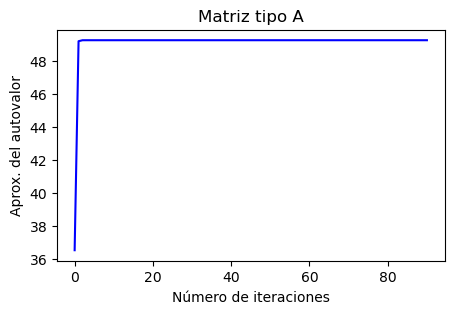

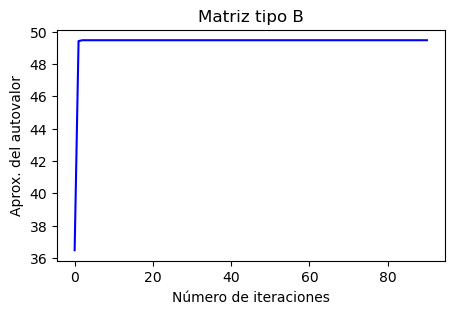

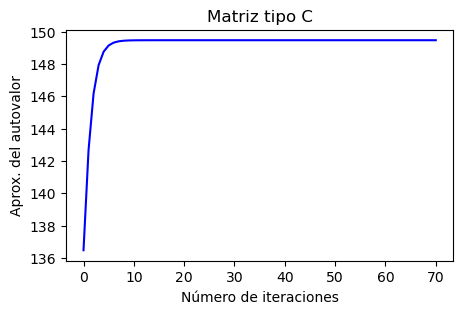

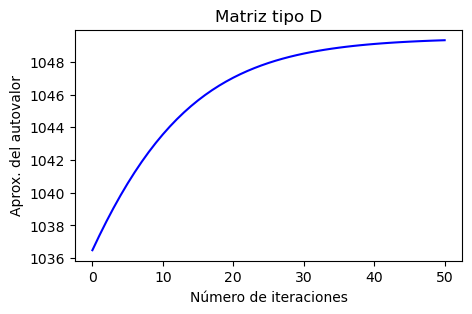

In [19]:
Matrices = generarMatrices(100)
v = np.random.rand(Matrices[0].shape[0])

def grafico_aproximaciones (M, titulo):
    #Para graficar, creo una lista con todos los números de cada una de las iteraciones
    iteraciones = list(range(0, 101))
    
    aproximaciones_M = vector_autovalores(M, v, 100)
    plt.figure(figsize=(5,3))
    plt.plot(iteraciones, aproximaciones_M, color = 'b')
    plt.title(titulo)
    plt.xlabel('Número de iteraciones')
    plt.ylabel('Aprox. del autovalor')
    plt.show()
    plt.close()

#Caso A
A = Matrices[0]
grafico_aproximaciones(A, 'Matriz tipo A')

#Caso B
B = Matrices[1]
grafico_aproximaciones(B, 'Matriz tipo B')

#Caso C
C = Matrices[2]
grafico_aproximaciones(C, 'Matriz tipo C')

#Caso D
D = Matrices[3]
grafico_aproximaciones(D, 'Matriz tipo D')



### Item B



Podemos observar que entre los graficos de las matrices A y B, no se presenta tanta diferencia entre cuantas iteraciones requieren para que sus valores converjan al autovalor de mayor modulo, es decir que no hace a la diferencia que una matriz sea simetrica o no. Luego, para los graficos de las matrices C y D, vemos que convergen a el mismo numero que B, nada mas que mas 100 y 1000 respectivamente. Lo mismo que le realizamos a las diagonales al crear las matrices. Y como estamos tratando con numeros mas grandes en las diagonales, podemos ver como esto afecta a la velocidad de conversion (la curva en los graficos), en la C le lleva un poco mas que a la B, pero no tanto como a la D.

### Item C

Podemos concluir que depende de las caracteristicas que posea nuestra matriz, es si el metodo va a converger rapidamente o no. Por ejemplo, cuanto mas grandes son los numeros de la diagonal, menor sera la velocidad de convergencia.

## EJERCICIO 3

In [14]:
#Defino una función que, dada una matriz, devuelve su autovalor de mayor módulo

#Comienzo por definir una función auxiliar que, dado un vector v, devuelve un nuevo vector r
#tal que r[i] sea el valor absoluto de v[i] para todo i.
def valores_absolutos(v):
    res = np.array([])
    for elemento in v:
        res = np.append(res, abs(elemento))
    return res

def autovalor_max (A):
    autovalores = np.linalg.eigvals(A)
    mod_autovalores = valores_absolutos(autovalores) 
    res = max(mod_autovalores)
    return res


#función que, dado un autovalor y una aproximación, calcula el valor del error como se encuentra definido en la consigna
def error(autov, aprox):
    e = abs(autov - aprox)
    return e

#función que, dado una autovalor y un vector v de aproximaciones, devuelve un vector r tal que,
#r[i] representa el error correspondiente a la aproximación l[i]
def vector_errores(autov, vector):
    res = np.array([])
    for elem in vector:
        e = error(autov, elem)
        res = np.append(res, e)
    return res

#Dado un vector v, devuelve una lista con el logaritmo en base 10 de cada uno de sus elementos
def log_en_base_10 (vector):
    res = []
    for elemento in vector:
        logElem = np.log10(elemento)
        res.append(logElem)
    return res
    


### Item A y B


/tmp/ipykernel_3293/1580465188.py:23: RuntimeWarning: invalid value encountered in double_scalars
  return num/den


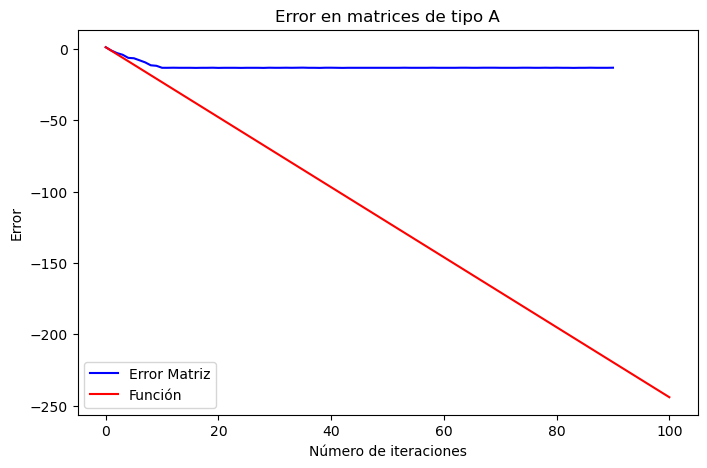

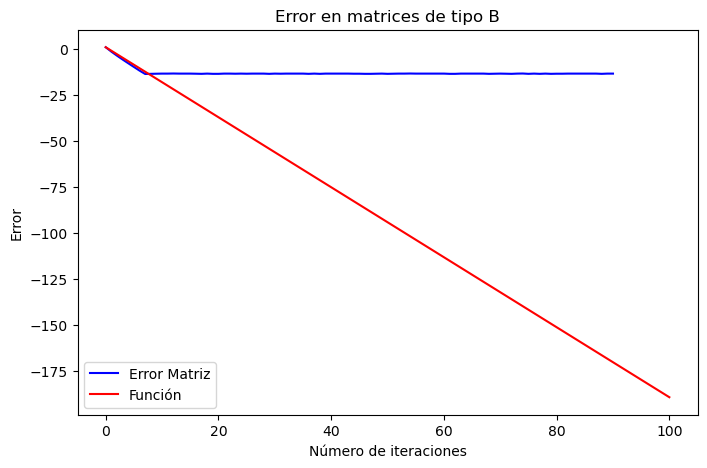

/tmp/ipykernel_3293/758503952.py:36: RuntimeWarning: divide by zero encountered in log10
  logElem = np.log10(elemento)


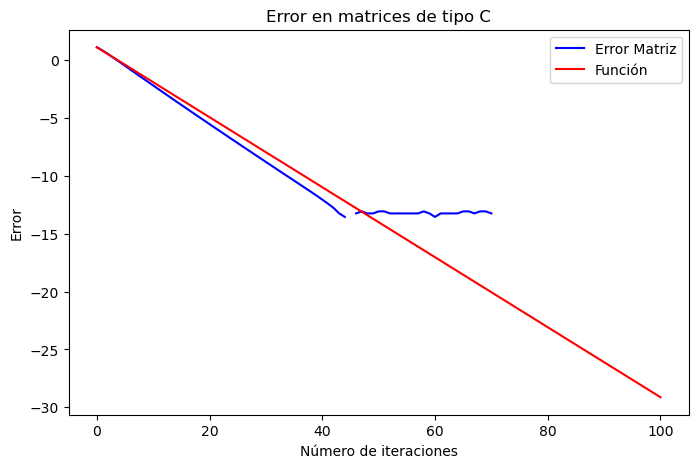

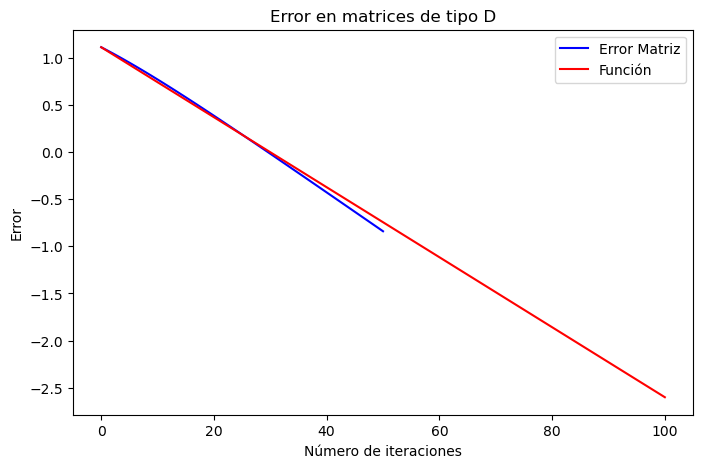

In [27]:
def grafico_errores(M, titulo):
    #Para graficar, defino como eje x la lista con todos los números de cada una de las iteraciones realizadas
    x = np.linspace(0, 100, 101)
    
    #Calculo errores
    aproximaciones_M = vector_autovalores(M, v, 100)
    errores_M = vector_errores(autovalor_max(M), aproximaciones_M)
    log_errores_M = log_en_base_10(errores_M) #calculo el logaritmo en base 10 de cada uno de los errores obtenidos
    
    #Calculamos el vector formado por el módulo de autovalores de A y ordenamos sus elementos de mayor a menor
    modulo_autovalores_M = valores_absolutos(np.linalg.eigvals(M))
    modulo_autovalores_M = sorted(modulo_autovalores_M, reverse=True)
    
    #Ahora definimos la función
    autov1 = modulo_autovalores_M[0]
    autov2 = modulo_autovalores_M[1]
    f = 2 * np.log10(autov2/autov1) * x + np.log10(errores_M[0])
    
    #Grafico
    fig, ax = plt.subplots()
    fig.set_size_inches(,5)
    ax.plot(x, log_errores_M, label = 'Error Matriz', color = 'b')
    ax.plot(x, f, label = 'Función', color = 'r')
    ax.set_xlabel('Número de iteraciones')
    ax.set_ylabel('Error')
    ax.set_title(titulo)
    
    ax.legend()
    
    plt.show()
    plt.close()

#Caso A
grafico_errores(A, 'Error en matrices de tipo A')

#Caso B
grafico_errores(B, 'Error en matrices de tipo B')

#Caso A
grafico_errores(C, 'Error en matrices de tipo C')

#Caso D
grafico_errores(D, 'Error en matrices de tipo D')


### Item C

Observando los gráficos obtenidos, podemos notar que la función f definida se asemeja a la gráfica del error hasta el punto donde la sucesión converge.Viendo esto, podemos suponer que f aporta información sobre la velocidad de convergencia del método para cada tipo de matriz.

Para el caso de las matrices de tipo A y B, vemos que la pendiente de la función f se muestra más empinada (con mayor valor absoluto de su pendiente) que en el caso de las matrices de tipo C y más incluso que en las de tipo D. Esto indicaría una convergencia del método más rápida para matrices A y B que para C y D, lo cual se corresponde con las conclusiones obtenidas en el ejercicio 2.


Además, como la pendiente de la función f está determinada por el logaritmo del cociente entre sus dos autovalores de mayor módulo, podemos concluir que existe una relación entre la velocidad de convergencia para una matriz y el valor de sus λ1 y λ2. Cuando el cociente entre estos valores tiende a 0, su logaritmo tiende a -∞, resultando en una recta de pendiente más empinada. Por otra parte, si este cociente tiende a 1, su logaritmo va a tender a 0, obteniendo una recta de pendiente casi nula.

Analizando los gráficos realizados, interpretamos que las matrices de tipo A y B representan ejemplos del primer caso, mientras que C y D se aproximan más a la situación descripta en el segundo, es decir, con un cociente entre λ1 y λ2 que tiende a 1.

Considerando la forma en la que fueron generadas estas matrices, creemos que esta diferencia entre casos puede explicarse con el aumento en los valores de los elementos de la diagonal de la matriz, que incrementó también el módulo de sus autovalores. De esta manera, aunque puede ocurrir que la direrencia entre |λ1| y |λ2| de una matriz B sea similar a la de una de tipo D, por tener esta última autovalores de módulo mayor, su cociente estará más cerca de 1. Análogamente, podemos describir lo ocurrido en el caso de las matrices de tipo C, con un cociente entre |λ1| y |λ2| más cercano a 1 que en los casos A y B, pero menos que en los de tipo D.
